<img src="./header.png" style="width: 100%; height: 1em;" alt="banner"/>

<b>UML Extractor<b/> - 
<span>v1.0</span>
<br>
<br>
<hr>

In [85]:
! pip install nltk

In [153]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
fr_stopwords = set(stopwords.words('french'))
import pandas as pd
from nltk.stem.snowball import FrenchStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/genereux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<br>

<img src="./header.png" style="width: 100%; height: 1em;" alt="banner"/>

<b>Functions<b/>

In [124]:
def get_input_text():
    return str(input('Input : ')).lower()

In [125]:
def get_static_input_text():
    _input = "Un propriétaire peut posséder plusieurs biens immobiliers."
    print('Input: {}'.format(_input.lower()))
    return _input

In [154]:
def tokenizer(text):    
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text.lower())

In [155]:
def statistician(text):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    stats = {'token':0, 'stats':{}, 'freq':{}}

    # Création d'un corpus de tokens par artiste
    stats['token'] = [word for word in tokenizer.tokenize(textual_text.lower()) if word not in fr_stopwords]
    stats['freq']  = fq = nltk.FreqDist(stats['token'])
    stats['stats'] = {'total': len(stats['token']), 'unique': len(fq.keys())}
    
    return stats

In [156]:
def stemmer(token):
    stemmer = FrenchStemmer()

    word_list_stem = [stemmer.stem(word) for word in token]
    
    return word_list_stem

In [128]:
def graphViewer(tab, title):
    colors = ['red', 'gray', 'blue', 'yellow', 'red']
    #print([x for i, x in enumerate(colors) if i < len(tab)])
    df = pd.DataFrame.from_dict(tab, orient='index')
    df.plot(kind='bar', color=[x for i, x in enumerate(colors) if i <= len(tab)], title=title)

<br/>

<img src="./header.png" style="width: 100%; height: 1em;" alt="banner"/>

<h6 style="color: red; margin-bottom: 1em;">main.py</h6><hr>

<b>GET INPUT</b>

In [160]:
textual_text = get_input_text()

Input : Un propriétaire est une personne qui possède des biens immobiliers et s'adresse à l'agence pour les présenter à ses clients.  Un propriétaire peut posséder plusieurs biens immobiliers  Un bien immobilier ne peut être la propriété que d'un seul propriétaire.  Un bien immobilier est soit à louer, soit à acheter. Un numéro permet de l'identifier parmi tous les biens immobiliers.  Un bien immobilier appartient toujours à une et une seule classe standard.  Une classe standard peut ne contenir aucun bien immobilier.  Un client peut être intéressé par plusieurs classes de biens.  Un client est identifié par un numéro attribué par compostage. Il peut visiter plusieurs fois le même bien accompagné d'un responsable différent.  Un propriétaire est identifié par son numéro.


In [68]:
#GET INPUT TEXT
textual_text = get_static_input_text()

Input: un propriétaire peut posséder plusieurs biens immobiliers.


<b>FIND STOP WORDS</b>

In [161]:
stopWordFound = [word for word in tokenizer(textual_text) if word in fr_stopwords]
stopWordFound

['un',
 'est',
 'une',
 'qui',
 'des',
 'et',
 's',
 'à',
 'l',
 'pour',
 'les',
 'à',
 'ses',
 'un',
 'un',
 'ne',
 'la',
 'que',
 'd',
 'un',
 'un',
 'est',
 'soit',
 'à',
 'soit',
 'à',
 'un',
 'de',
 'l',
 'les',
 'un',
 'à',
 'une',
 'et',
 'une',
 'une',
 'ne',
 'un',
 'par',
 'de',
 'un',
 'est',
 'par',
 'un',
 'par',
 'il',
 'le',
 'même',
 'd',
 'un',
 'un',
 'est',
 'par',
 'son']

<b>STATS WITHOUT STOPWORD</b>

In [162]:
word_list1 = statistician(textual_text)

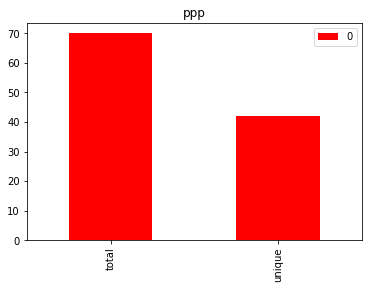

In [163]:
graphViewer(word_list1['stats'], 'ppp')

In [164]:
word_list1

{'token': ['propriétaire',
  'personne',
  'possède',
  'biens',
  'immobiliers',
  'adresse',
  'agence',
  'présenter',
  'clients',
  'propriétaire',
  'peut',
  'posséder',
  'plusieurs',
  'biens',
  'immobiliers',
  'bien',
  'immobilier',
  'peut',
  'être',
  'propriété',
  'seul',
  'propriétaire',
  'bien',
  'immobilier',
  'louer',
  'acheter',
  'numéro',
  'permet',
  'identifier',
  'parmi',
  'tous',
  'biens',
  'immobiliers',
  'bien',
  'immobilier',
  'appartient',
  'toujours',
  'seule',
  'classe',
  'standard',
  'classe',
  'standard',
  'peut',
  'contenir',
  'aucun',
  'bien',
  'immobilier',
  'client',
  'peut',
  'être',
  'intéressé',
  'plusieurs',
  'classes',
  'biens',
  'client',
  'identifié',
  'numéro',
  'attribué',
  'compostage',
  'peut',
  'visiter',
  'plusieurs',
  'fois',
  'bien',
  'accompagné',
  'responsable',
  'différent',
  'propriétaire',
  'identifié',
  'numéro'],
 'stats': {'total': 70, 'unique': 42},
 'freq': FreqDist({'peut':

<b>STEMMING</b>

As we don't have lemmatization french function corpus in nltk we're going to use stemming to end this preprocess step

In [158]:
stem_token = stemmer(word_list1['token'])

In [159]:
stem_token

['propriétair', 'peut', 'possed', 'plusieur', 'bien', 'immobili']